In [3]:
import requests
from bs4 import BeautifulSoup
import csv
url = "https://www.nhb.org.in/data-graphs/"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers, verify=False)
response.raise_for_status()
soup = BeautifulSoup(response.content, "lxml")
table = soup.find("div", id="home")
if not table:
    print("Div with id='home' not found.")
    exit()
headers = [th.get_text(strip=True) for th in table.find_all("th")]
rows = []
for tr in table.find_all("tr")[1:]:
    cells = [td.get_text(strip=True) for td in tr.find_all("td")]
    if cells:
        rows.append(cells)
csv_filename = "nhb_home_table.csv"
with open(csv_filename, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(headers)
    writer.writerows(rows)
print(f"Table saved to {csv_filename}")


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.nhb.org.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Table saved to nhb_home_table.csv


In [4]:
import pandas as pd , numpy as np

In [28]:
import pandas as pd

# Load the CSV
df = pd.read_csv("nhb_home_table.csv")

# Ensure quarterly columns exist
quarters = ['2010-Q1', '2010-Q2', '2010-Q3', '2010-Q4']
if all(q in df.columns for q in quarters):
    # Calculate average and create a new 2010 column
    df['2010'] = df[quarters].mean(axis=1)

    # Drop the quarterly columns if you don't need them
    df.drop(columns=quarters, inplace=True)

# Save to a new CSV
df.to_csv("cleaned_data.csv", index=False)
print("Saved as cleaned_data.csv")


Saved as cleaned_data.csv


In [31]:
import pandas as pd

# Load the CSV
df = pd.read_csv("cleaned_data.csv")

# Calculate the average for each city across all years (skip the 'city' column)
df['average'] = df.iloc[:, 1:].mean(axis=1)

# Replace the year columns with the calculated average values
for year in df.columns[1:]:
    df[year] = df['average']

# Drop the 'average' column and save the new CSV
df.drop(columns=['average'], inplace=True)
df.to_csv("india_cities_avg_updated.csv", index=False)

print("✅ New CSV saved as 'Housing.csv'")


✅ New CSV saved as 'Housing.csv'


In [22]:
!pip install fredapi

         date   value
0  2007-01-01  322100
1  2007-04-01  310100
2  2007-07-01  301200
3  2007-10-01  305800
4  2008-01-01  290400
5  2008-04-01  304200
6  2008-07-01  285100
7  2008-10-01  276600
8  2009-01-01  257000
9  2009-04-01  273400
10 2009-07-01  274100
11 2009-10-01  272900
12 2010-01-01  275300
13 2010-04-01  268800
14 2010-07-01  266000
15 2010-10-01  278000
16 2011-01-01  268100
17 2011-04-01  267600
18 2011-07-01  263000
19 2011-10-01  259700
20 2012-01-01  278000
21 2012-04-01  282700
22 2012-07-01  294500
23 2012-10-01  297700
24 2013-01-01  307400
25 2013-04-01  320400
26 2013-07-01  324400
27 2013-10-01  334400
28 2014-01-01  331400
29 2014-04-01  340600
30 2014-07-01  340400
31 2014-10-01  369400
32 2015-01-01  348000
33 2015-04-01  339700
34 2015-07-01  347400
35 2015-10-01  366700


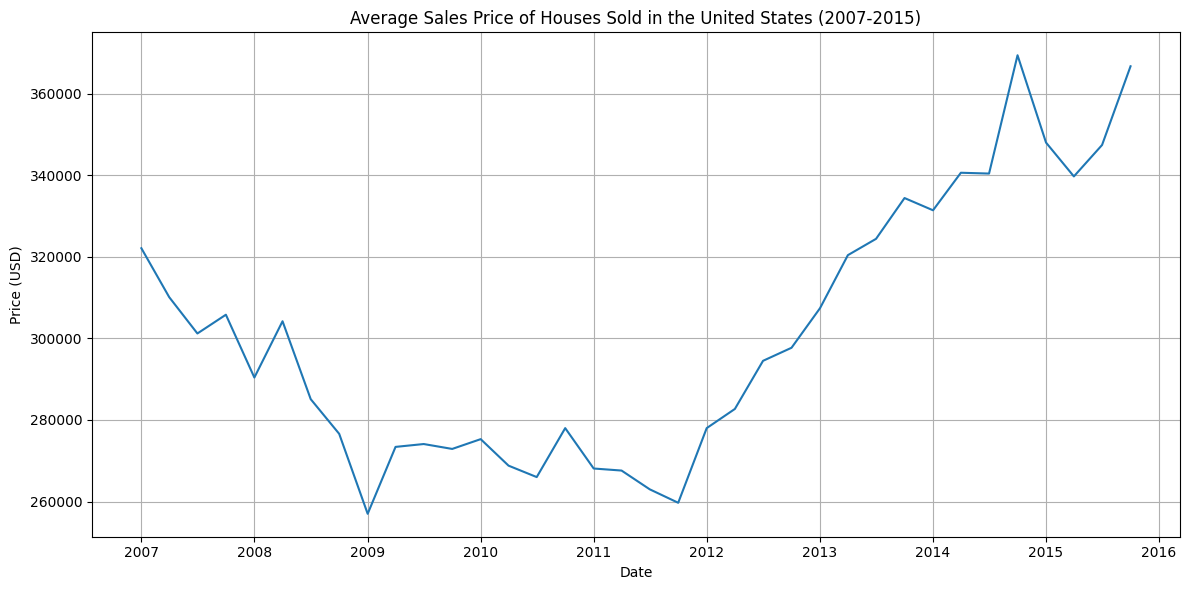

Data saved to CSV file: house_prices_2007_2015.csv


In [27]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import os
from dotenv import load_dotenv

# Load API key from environment variable
load_dotenv()
api_key = os.getenv("FRED_API_KEY")

# If you don't have an environment variable set up, uncomment and replace with your API key
api_key = "1aecfa548af80c3edaabac5a750eb1c8"  # Your API key as a string

# FRED series ID for Average Sales Price of Houses Sold in the US
series_id = "ASPUS"

# Define the date range (2007-01-01 to 2015-12-31)
start_date = "2007-01-01"
end_date = "2015-12-31"

# Construct the API URL
url = f"https://api.stlouisfed.org/fred/series/observations"
params = {
    "series_id": series_id,
    "api_key": api_key,
    "file_type": "json",
    "observation_start": start_date,
    "observation_end": end_date
}

# Add error handling
try:
    # Make the API request
    response = requests.get(url, params=params)
    response.raise_for_status()  # Raise an exception for bad status codes
    data = response.json()

    # Convert to DataFrame
    df = pd.DataFrame(data["observations"])

    # Convert date strings to datetime objects and value strings to float
    df["date"] = pd.to_datetime(df["date"])
    df["value"] = pd.to_numeric(df["value"], errors="coerce")

    # Drop rows with missing values
    df = df.dropna(subset=["value"])

    # Display the data
    print(df[["date", "value"]])

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(df["date"], df["value"])
    plt.title("Average Sales Price of Houses Sold in the United States (2007-2015)")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    plt.savefig("house_prices_2007_2015.png")

    # Show the plot
    plt.show()

    # Save the data to CSV
    df[["date", "value"]].to_csv("house_prices_2007_2015.csv", index=False)
    print("Data saved to CSV file: house_prices_2007_2015.csv")
    
except requests.exceptions.ConnectionError as e:
    print(f"Connection error: {e}")
    print("\nTroubleshooting tips:")
    print("1. Check your internet connection")
    print("2. Verify the API URL is correct")
    print("3. Try again later as the service might be temporarily down")
    
except requests.exceptions.HTTPError as e:
    print(f"HTTP error: {e}")
    print("Check if your API key is valid")
    
except Exception as e:
    print(f"An error occurred: {e}")